## Practical Work 2

We will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

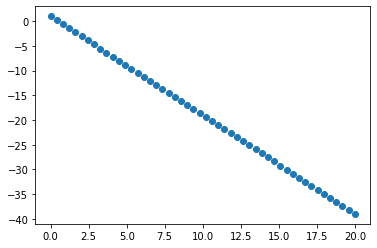

In [6]:
plt.scatter(X, y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [36]:
def gradient_descent1(X, y, alpha, iterations):
  cost_vals = []
  h_s = []
  thetas0 = []
  thetas1 = []

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  i = 0
  grad = np.ones((2, 1))
  m = y.shape[0]

  while i < iterations and np.linalg.norm(grad, 2) > 0.001:
      print(f"****************** Iteration {i} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * X
      h_s.append(h_x)
      print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y
      j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
      print(f'Error Vector: \n{error}')
      print(f'\nj = {j}')
      cost_vals.append(j)
      
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / m
      d_theta_1 = np.sum(error * X) / m
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      print(f"Gradient Vector: \n{grad}")
      print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      theta_0 -= alpha * d_theta_0
      theta_1 -= alpha * d_theta_1
      print(f'theta_0_new : {theta_0}')
      print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

      # Convergence check
      if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.001:
        break

      i += 1
    
  return theta_0, theta_1, cost_vals, h_s, thetas0, thetas1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [37]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = gradient_descent1(X, y, alpha= 0.0005, iterations= 300)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204087
Gradient Vector: 
[[ 19.       ]
 [259.3877551]]
Gradient Vector Norm: 260.08269357432516
theta_0_new : -0.0095
theta_1_new : -0.129693877551

#### Calculate r2 score

In [14]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y,h_s[-1])

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

In [18]:
def plot_loss_epochs(losses, epochs, f_size):
  plt.figure(figsize=f_size)
  plt.plot(losses, epochs, marker='*')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title("plot loss vs epochs")
  plt.show()

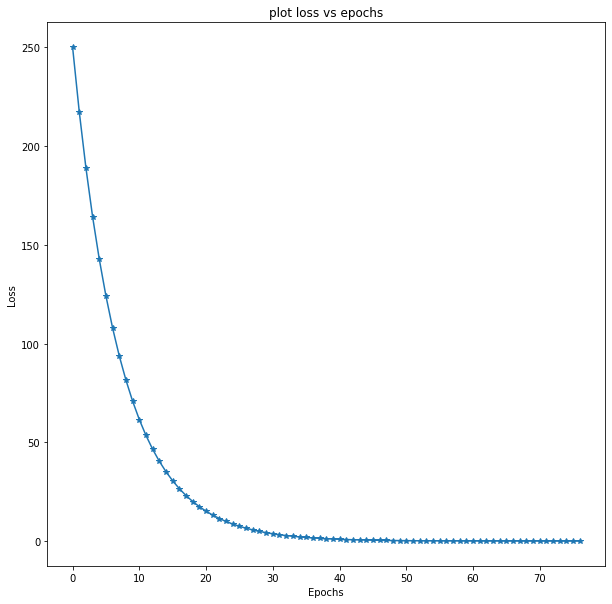

In [40]:
plot_loss_epochs(np.arange(len(cost_vals)), cost_vals, (10,10))

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [19]:
def plot_loss_theta(losses, thetas, alpha):
  plt.figure(figsize=(10, 10))
  plt.plot(thetas, losses, marker='*')
  plt.xlabel('Theta 0')
  plt.ylabel('Loss')
  plt.title(f"Learning Rate = {alpha}")
  plt.show()

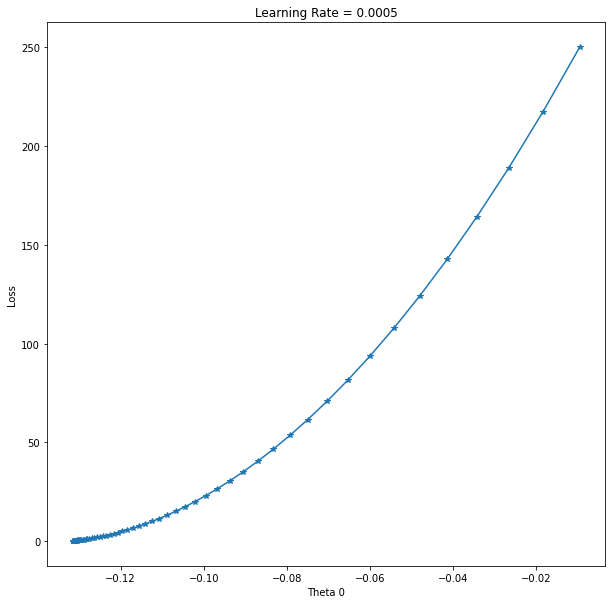

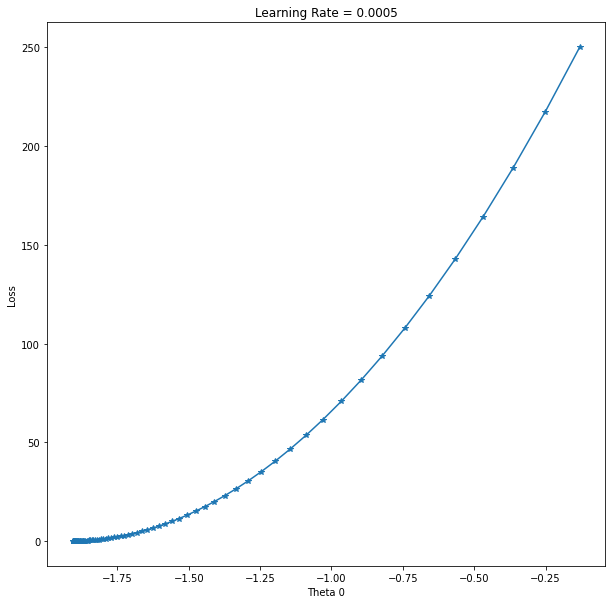

In [44]:
plot_loss_theta(cost_vals, thetas0, alpha=0.0005)
plot_loss_theta(cost_vals, thetas1, alpha=0.0005)

#### Plot all regression lines till converge

In [20]:
def plot_reg_lines(h_s, X, y):
  plt.figure(figsize=(10, 10))
  plt.scatter(X, y, marker='*')
  for i in range(len(h_s)):
    plt.plot(X, h_s[i], 'r')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title(f"All regression lines")
  plt.show()

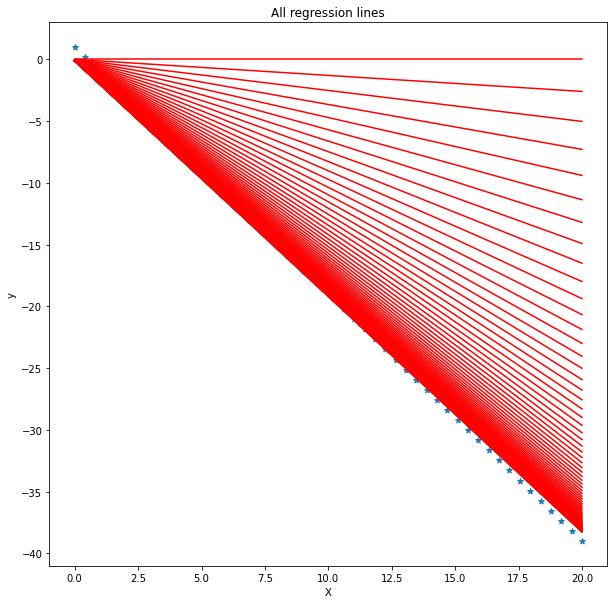

In [56]:
plot_reg_lines(h_s, X, y)

#### Plot the best regression line

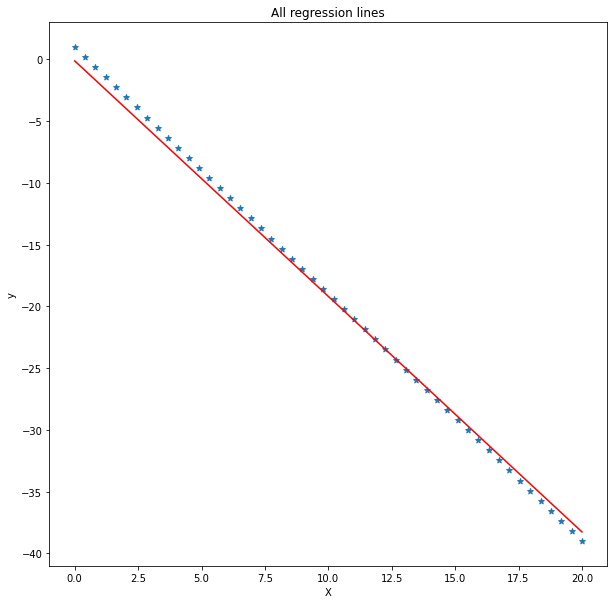

In [68]:
plot_reg_lines([h_s[-1]], X, y)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [70]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = gradient_descent1(X, y, alpha= 0.00005, iterations= 1000)

Streaming output truncated to the last 5000 lines.
theta_1_new : -1.8123903164793134
****************** Iteration 430 ****************** 
h(x): [ -0.12850319  -0.86825434  -1.60800549  -2.34775664  -3.08750779
  -3.82725894  -4.56701009  -5.30676124  -6.04651239  -6.78626354
  -7.52601469  -8.26576584  -9.00551699  -9.74526814 -10.48501928
 -11.22477043 -11.96452158 -12.70427273 -13.44402388 -14.18377503
 -14.92352618 -15.66327733 -16.40302848 -17.14277963 -17.88253078
 -18.62228193 -19.36203308 -20.10178423 -20.84153538 -21.58128653
 -22.32103768 -23.06078883 -23.80053998 -24.54029113 -25.28004228
 -26.01979343 -26.75954458 -27.49929573 -28.23904687 -28.97879802
 -29.71854917 -30.45830032 -31.19805147 -31.93780262 -32.67755377
 -33.41730492 -34.15705607 -34.89680722 -35.63655837 -36.37630952]
Error Vector: 
[-1.12850319 -1.05192781 -0.97535243 -0.89877705 -0.82220167 -0.74562629
 -0.6690509  -0.59247552 -0.51590014 -0.43932476 -0.36274938 -0.286174
 -0.20959862 -0.13302324 -0.05644786

In [71]:
r2_score(y,h_s[-1])

0.9965793400861428

In [17]:
def plot_all(cost_vals, thetas0, thetas1, alpha, h_s, X, y, f_size):
  plot_loss_epochs(np.arange(len(cost_vals)), cost_vals, f_size)
  plot_loss_theta(cost_vals, thetas0, alpha)
  plot_loss_theta(cost_vals, thetas1, alpha)
  plot_reg_lines(h_s, X, y)
  plot_reg_lines([h_s[-1]], X, y)

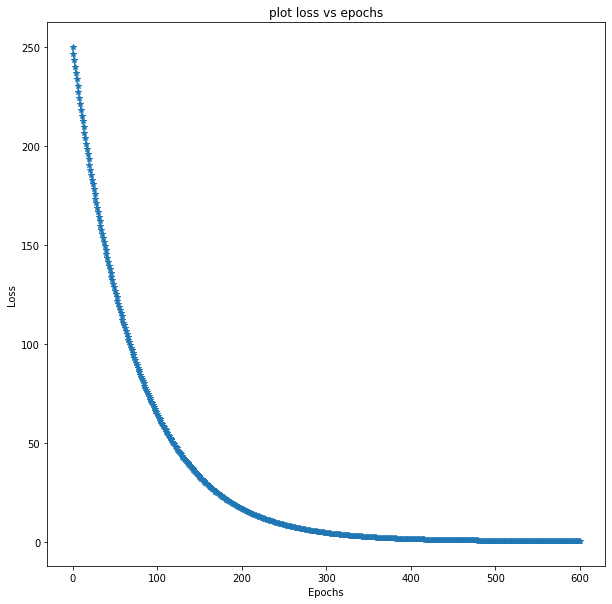

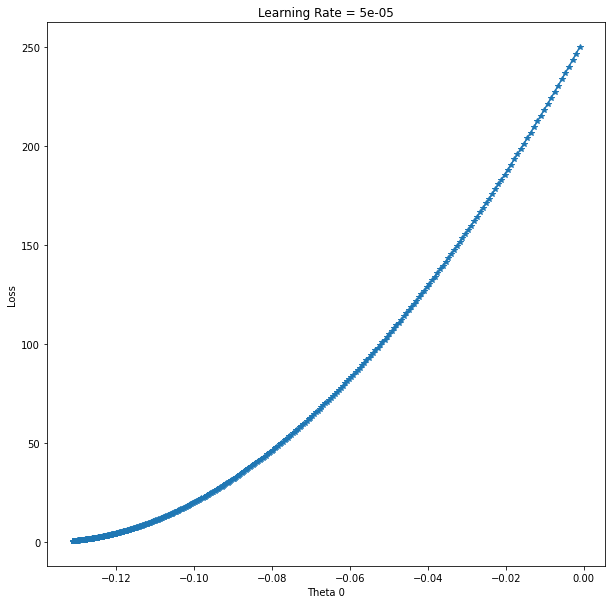

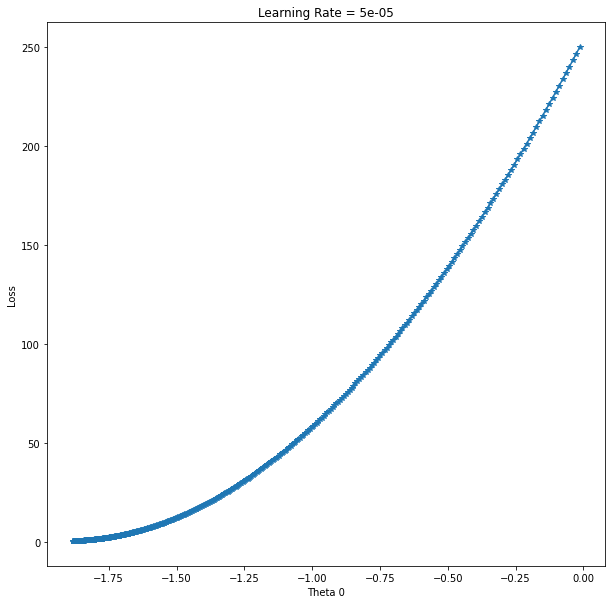

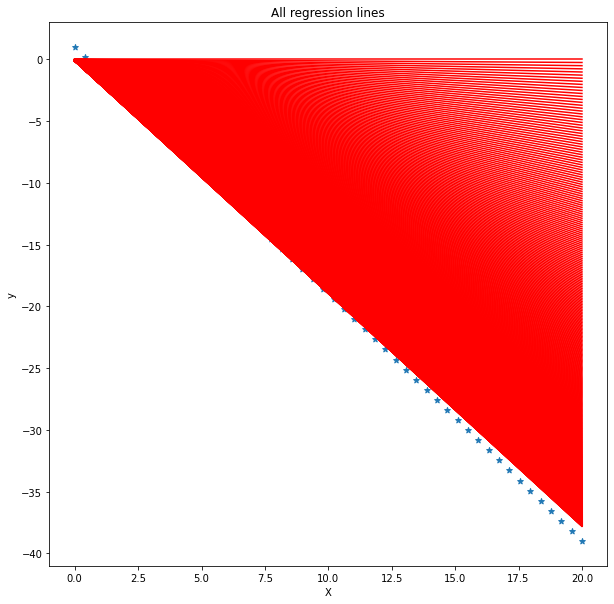

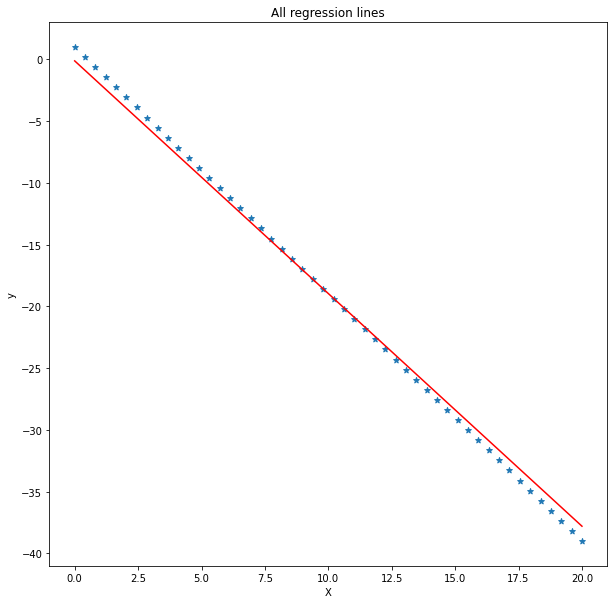

In [77]:
plot_all(cost_vals, thetas0, thetas1, 0.00005, h_s, X, y, (10,10))

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [78]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = gradient_descent1(X, y, alpha= 0.005, iterations= 300)

****************** Iteration 0 ****************** 
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector: 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204087
Gradient Vector: 
[[ 19.       ]
 [259.3877551]]
Gradient Vector Norm: 260.08269357432516
theta_0_new : -0.095
theta_1_new : -1.2969387755102

In [79]:
r2_score(y,h_s[-1])

0.9976200723230484

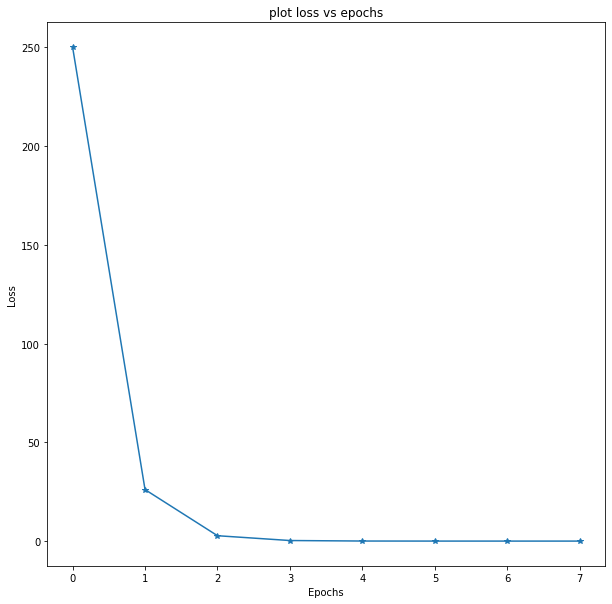

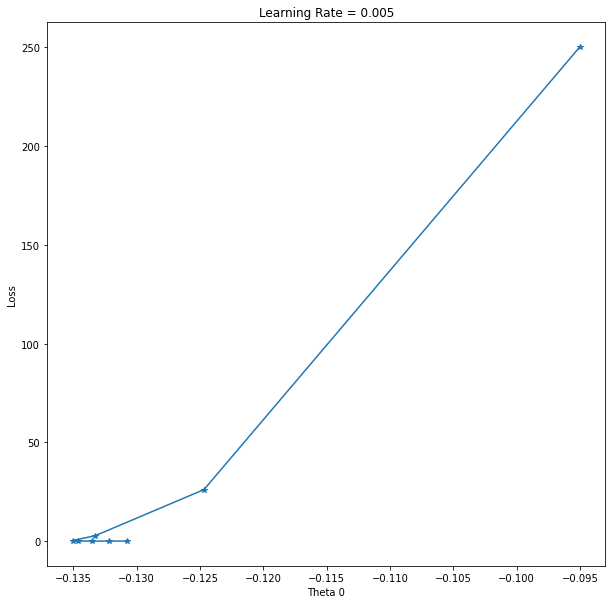

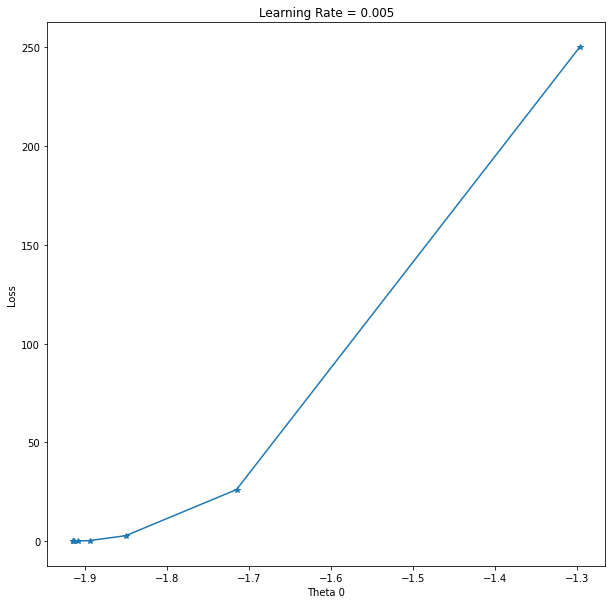

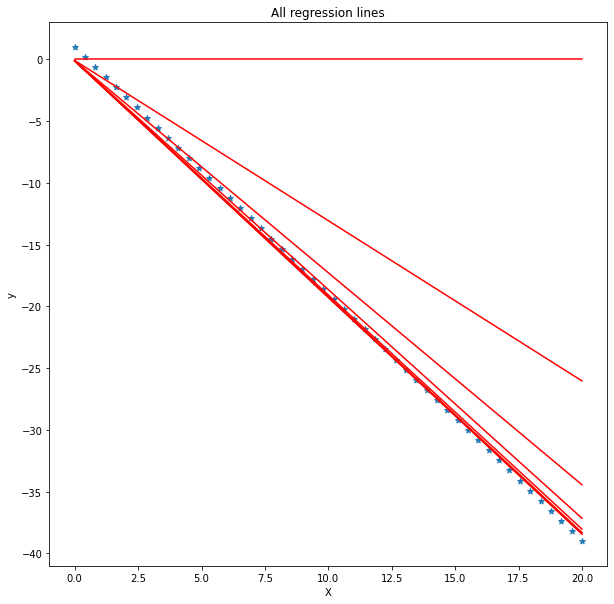

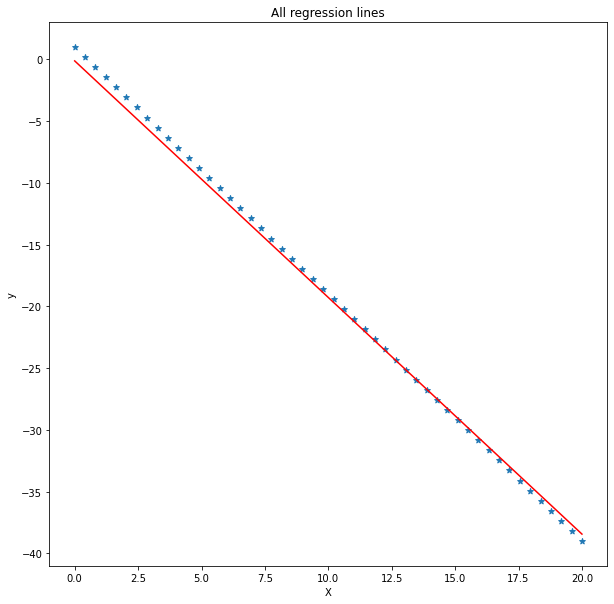

In [80]:
plot_all(cost_vals, thetas0, thetas1, 0.005, h_s, X, y, (10,10))

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [5]:
import random

Shuffle the data

In [10]:
temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)
X, y = list(X), list(y)

In [40]:
def stochastic(X, y, alpha, epochs):
  ecost_vals = []
  e_h_s = []
  thetas0 = []
  thetas1 = []
  e_cost = []
  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  i = 0
  grad = np.ones((2, 1))

  while i < epochs and np.linalg.norm(grad, 2) > 0.001:
    iter = 0
    cost_vals = []
    h_s = []
    print(f"****************** Epoch {i} ****************** ")

    for x_i, y_i in zip(X, y): 
      # print(f"****************** Iteration {iter} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * x_i
      h_s.append(h_x)
      # print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y_i
      j = (1 / 2) * error**2
      # print(f'Error Vector: \n{error}')
      # print(f'\nj = {j}')
      cost_vals.append(j)
      ecost_vals.append(j)
      # 4. Calculate the gradient
      d_theta_0 = error
      d_theta_1 = error * x_i
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      # print(f"Gradient Vector: \n{grad}")
      # print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      theta_0 -= alpha * d_theta_0
      theta_1 -= alpha * d_theta_1
      # print(f'theta_0_new : {theta_0}')
      # print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)
      iter += 1

    print(f"h(x): {h_x}")
    print(f'Error Vector: \n{error}')
    print(f'\nj = {j}')
    print(f"Gradient Vector: \n{grad}")
    print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")
    print(f'theta_0_new : {theta_0}')
    print(f'theta_1_new : {theta_1}')

    e_h_s.append(h_s)
    e_cost.append(cost_vals[-1])

    # Convergence check
    if i > 1 and abs(e_cost[-2] - e_cost[-1]) < 0.001:
      break

    i += 1
    
  return theta_0, theta_1, ecost_vals, e_h_s, thetas0, thetas1

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [29]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = stochastic(X, y, alpha=0.0005, epochs=300)

****************** Epoch 0 ****************** 
h(x): -14.601401098216577
Error Vector: 
-0.09119701658392287

j = 0.004158447916904152
Gradient Vector: 
[[-0.09119702]
 [-0.70724217]]
Gradient Vector Norm: 0.7130977366733714
theta_0_new : -0.13154115248848436
theta_1_new : -1.8654908605304714
****************** Epoch 1 ****************** 
h(x): -15.002861678353918
Error Vector: 
-0.49265759672126386

j = 0.12135575380358572
Gradient Vector: 
[[-0.4926576 ]
 [-3.82060993]]
Gradient Vector Norm: 3.852242434417628
theta_0_new : -0.12796536406353154
theta_1_new : -1.916136666846567
****************** Epoch 2 ****************** 
h(x): -15.010493703765063
Error Vector: 
-0.5002896221324082

j = 0.12514485300669392
Gradient Vector: 
[[-0.50028962]
 [-3.87979707]]
Gradient Vector Norm: 3.9119196064434525
theta_0_new : -0.12080473579115047
theta_1_new : -1.9180140549783047
****************** Epoch 3 ****************** 
h(x): -15.007563824807672
Error Vector: 
-0.49735974317501785

j = 0.1236833

In [30]:
r2_score(y,h_s[-1])

0.9985314807118423

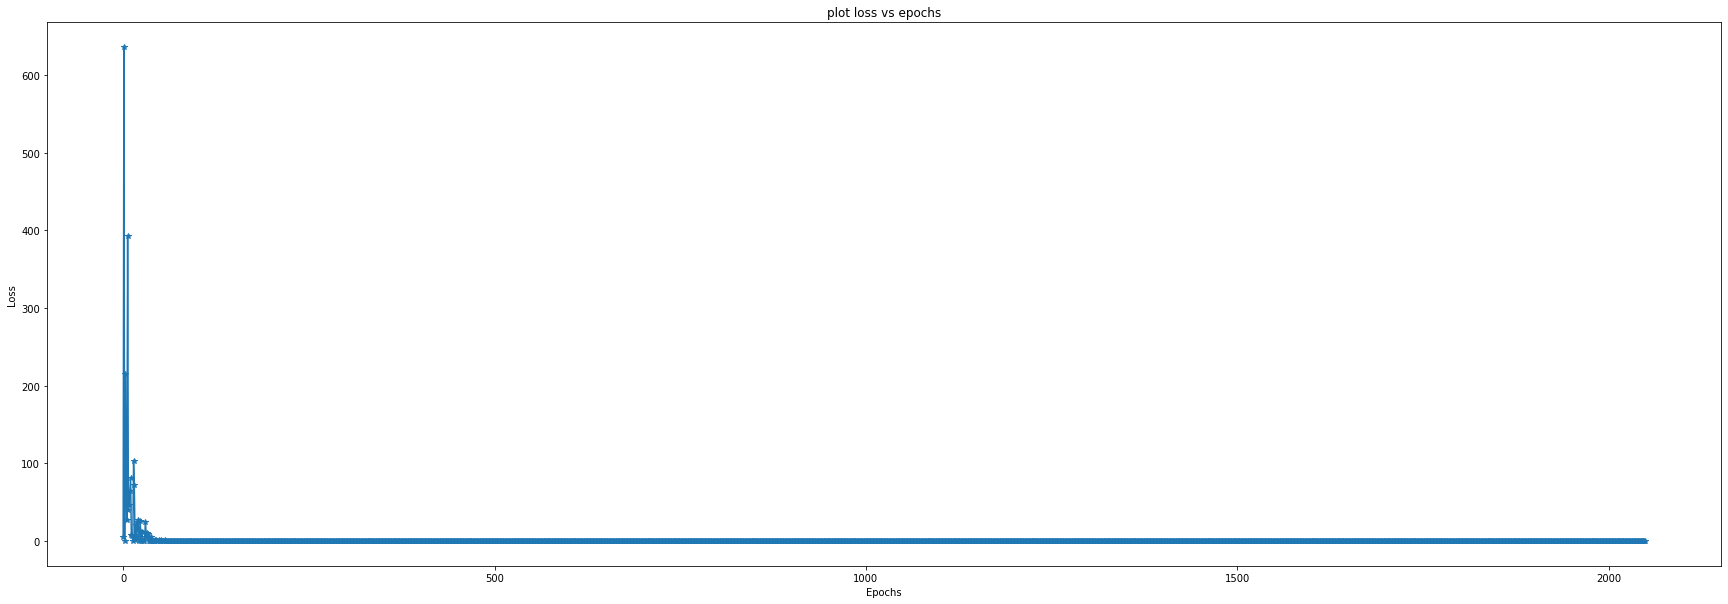

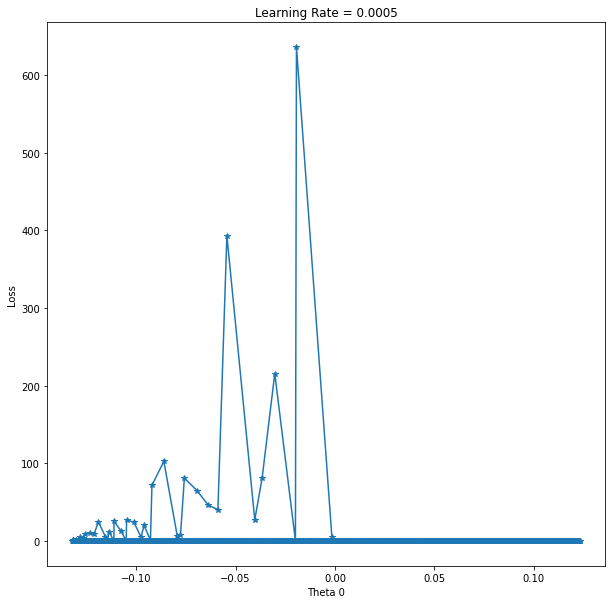

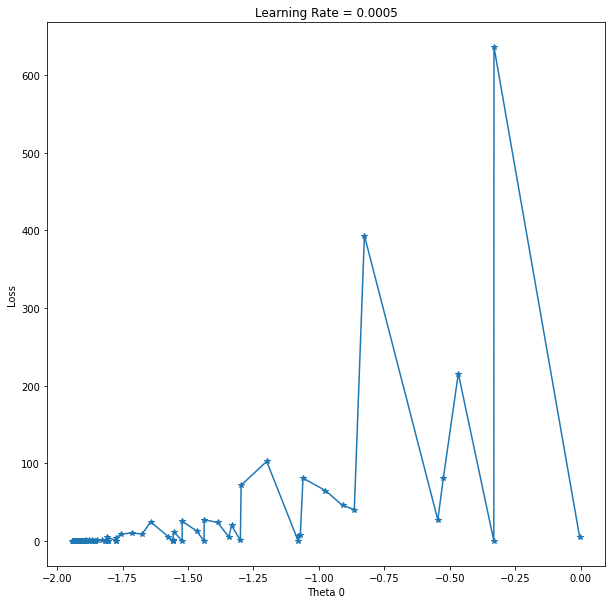

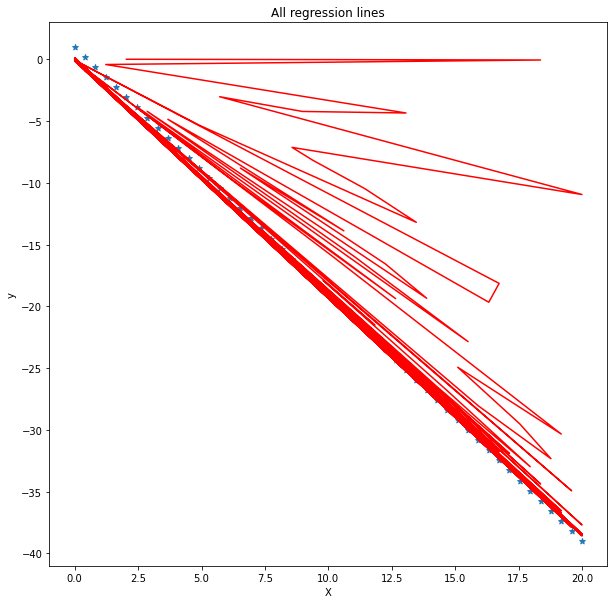

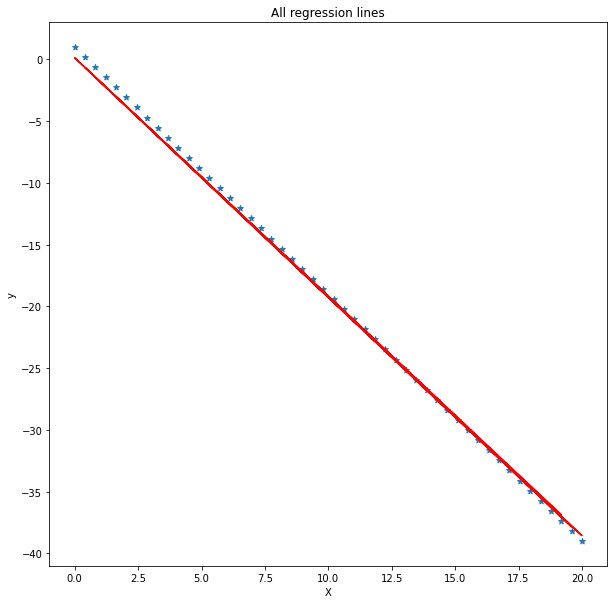

In [39]:
plot_all(cost_vals, thetas0, thetas1, 0.0005, h_s, X, y, (30, 10))

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [41]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = stochastic(X, y, alpha=0.0001, epochs=300)

****************** Epoch 0 ****************** 
h(x): -7.398388887120016
Error Vector: 
7.111815194512638

j = 25.288957680450416
Gradient Vector: 
[[ 7.11181519]
 [55.15285253]]
Gradient Vector Norm: 55.60948711715089
theta_0_new : -0.0693859311071381
theta_1_new : -0.9506626345662667
****************** Epoch 1 ****************** 
h(x): -11.170023268601723
Error Vector: 
3.3401808130309316

j = 5.578403931869988
Gradient Vector: 
[[ 3.34018081]
 [25.90344304]]
Gradient Vector Norm: 26.117908974141596
theta_0_new : -0.10361368987318345
theta_1_new : -1.429617808103147
****************** Epoch 2 ****************** 
h(x): -13.069693648899383
Error Vector: 
1.4405104327332712

j = 1.037535153406698
Gradient Vector: 
[[ 1.44051043]
 [11.1713054 ]]
Gradient Vector Norm: 11.263797520077691
theta_0_new : -0.12013125821444673
theta_1_new : -1.6709476980256766
****************** Epoch 3 ****************** 
h(x): -14.026352319083632
Error Vector: 
0.4838517625490226

j = 0.11705626406089789
Gradi

In [42]:
r2_score(y,h_s[-1])

0.9976406073488097

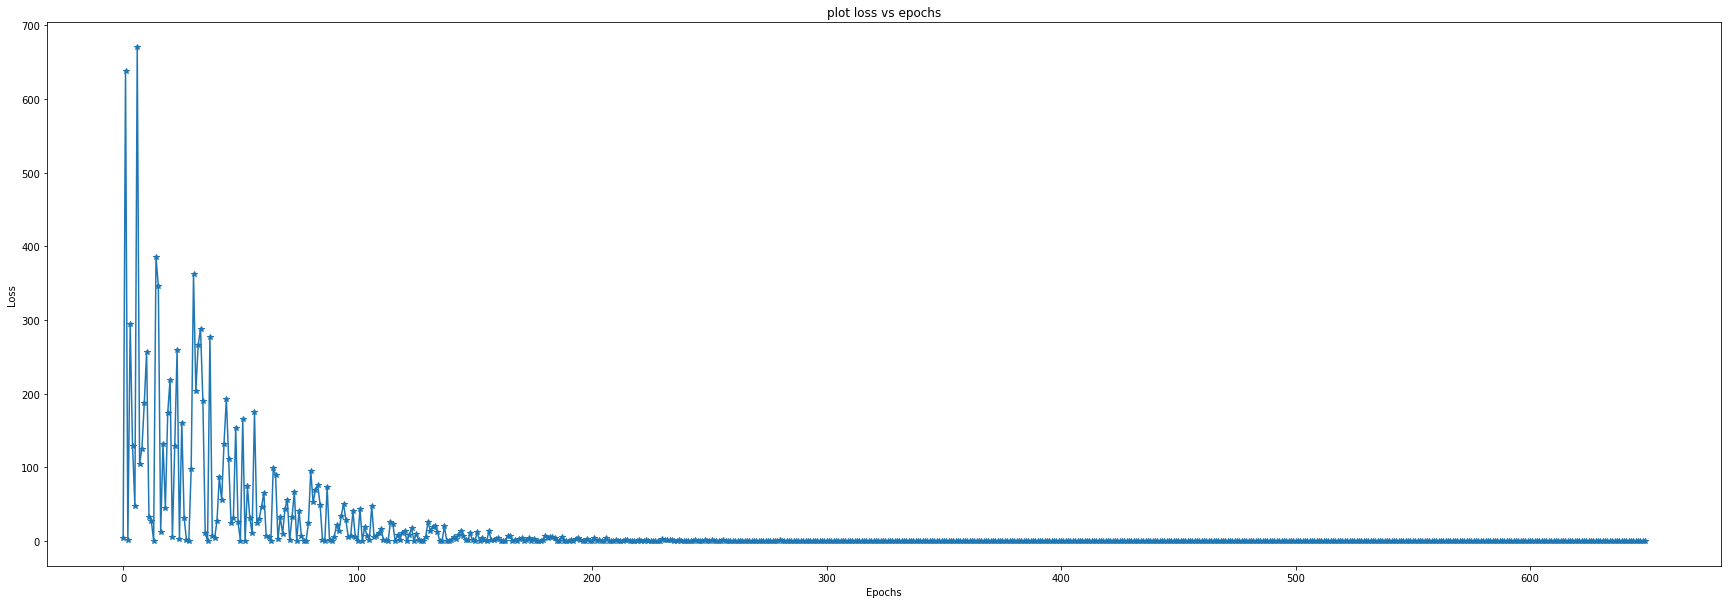

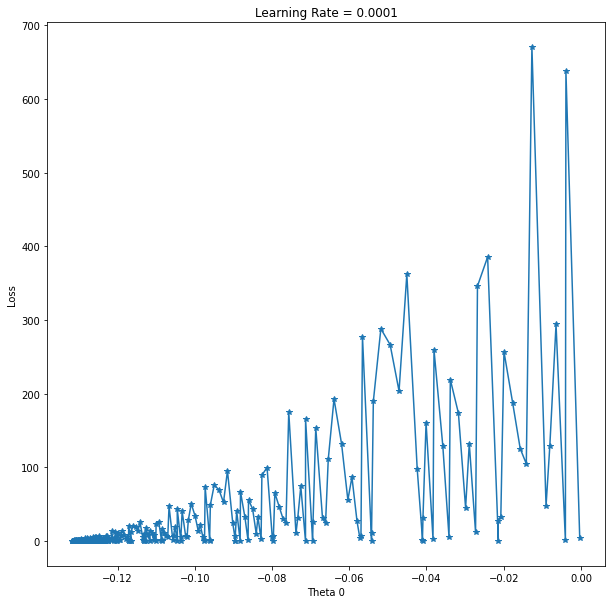

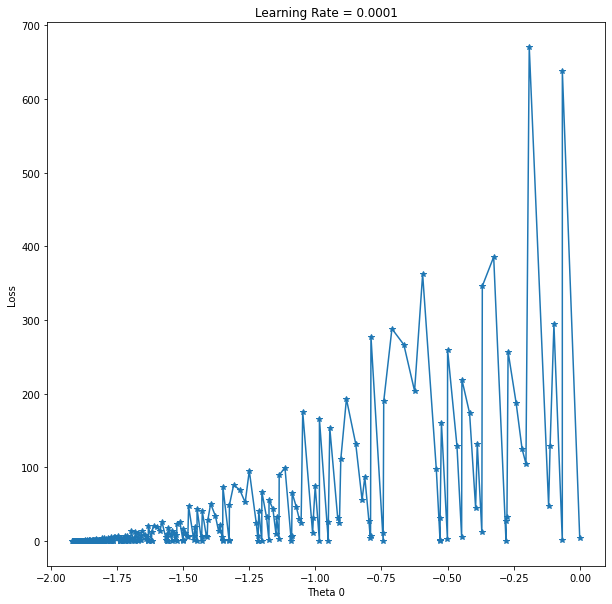

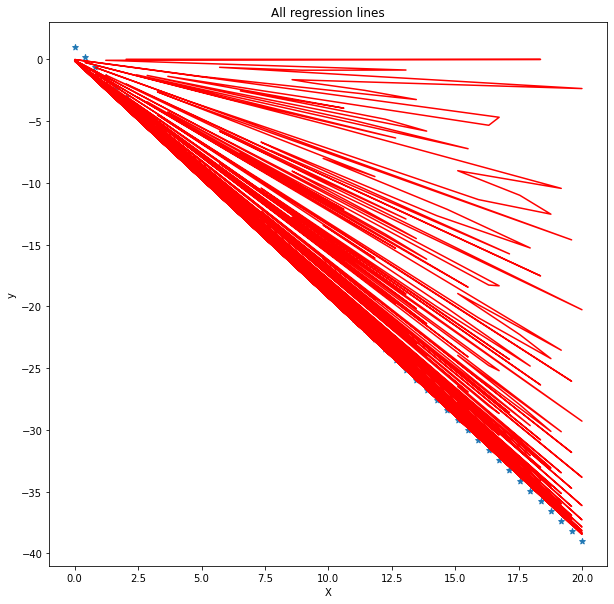

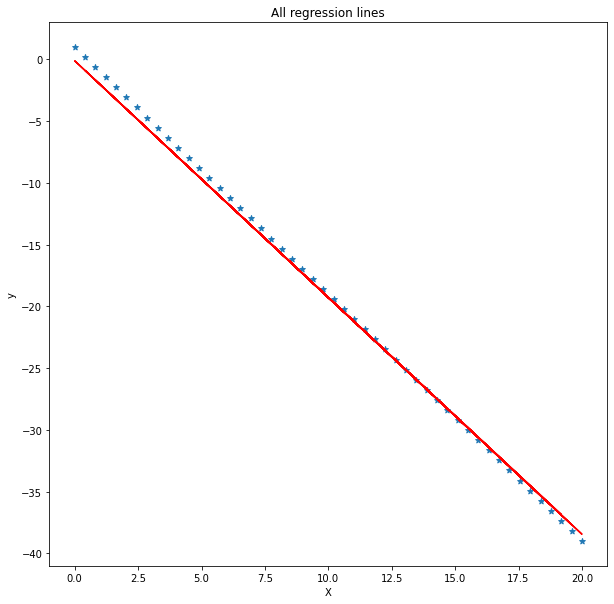

In [44]:
plot_all(cost_vals, thetas0, thetas1, 0.0001, h_s, X, y, (30, 10))

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [45]:
theta_0, theta_1, cost_vals, h_s, thetas0, thetas1 = stochastic(X, y, alpha=0.00007, epochs=300)

****************** Epoch 0 ****************** 
h(x): -5.661511807085577
Error Vector: 
8.848692274547076

j = 39.14967748481455
Gradient Vector: 
[[ 8.84869227]
 [68.62251152]]
Gradient Vector Norm: 69.19066730315666
theta_0_new : -0.05320316179350564
theta_1_new : -0.7280600880004279
****************** Epoch 1 ****************** 
h(x): -9.209710169443166
Error Vector: 
5.300493912189488

j = 14.047617856578912
Gradient Vector: 
[[ 5.30049391]
 [41.10587116]]
Gradient Vector Norm: 41.44620464151942
theta_0_new : -0.08579603888397765
theta_1_new : -1.179429971748058
****************** Epoch 2 ****************** 
h(x): -11.409153249294533
Error Vector: 
3.101050832338121

j = 4.808258132372476
Gradient Vector: 
[[ 3.10105083]
 [24.04896564]]
Gradient Vector Norm: 24.248077543352753
theta_0_new : -0.10561247913192694
theta_1_new : -1.459273254811336
****************** Epoch 3 ****************** 
h(x): -12.77247228477407
Error Vector: 
1.7377317968585846

j = 1.5098558989066826
Gradient Ve

In [46]:
r2_score(y,h_s[-1])

0.9976428802485233

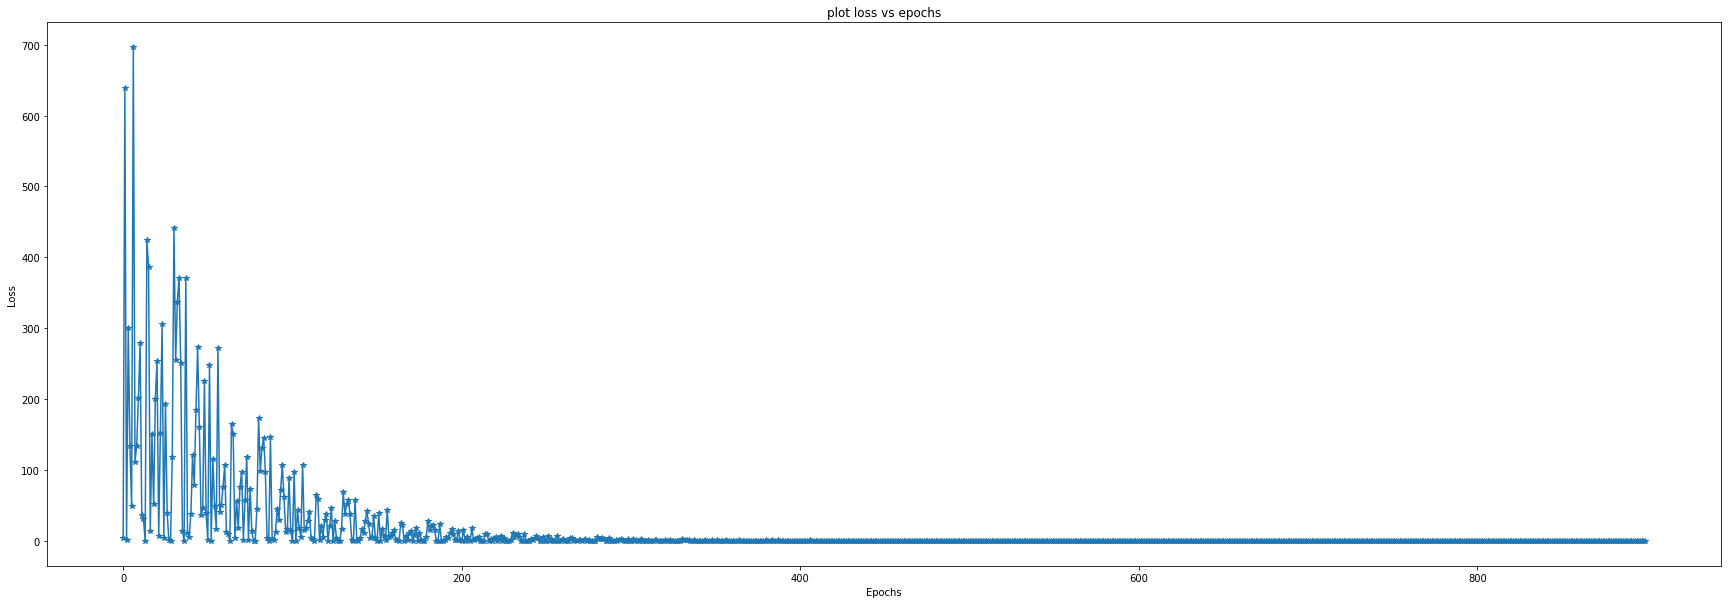

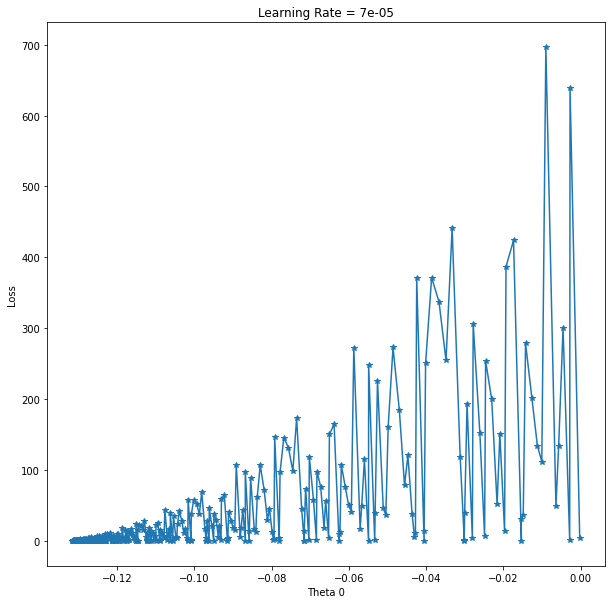

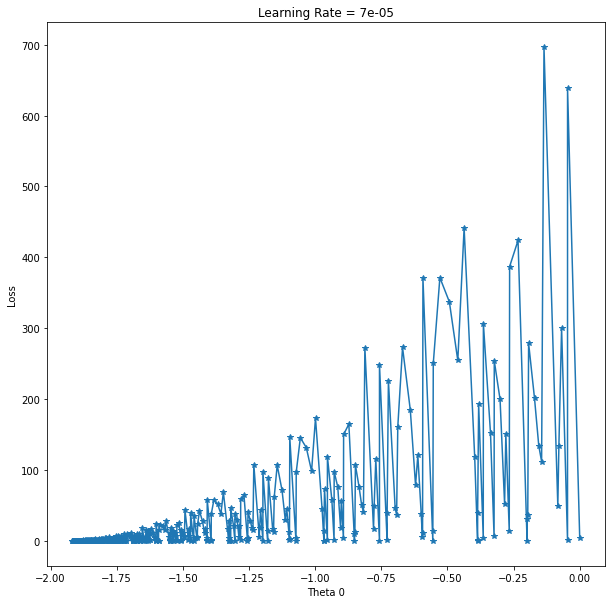

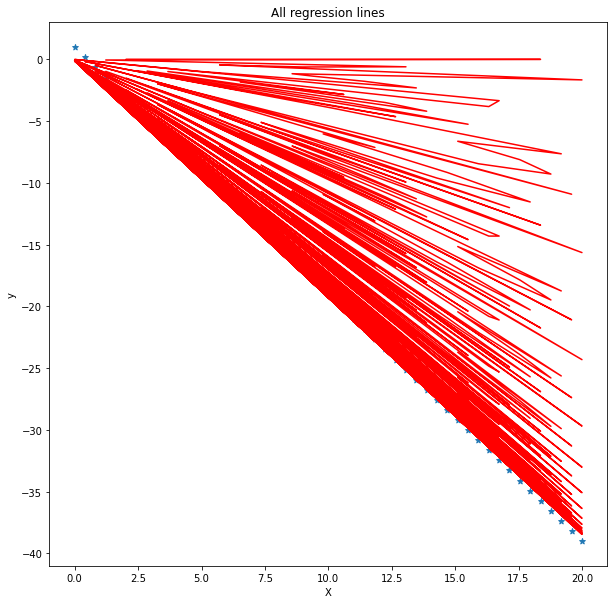

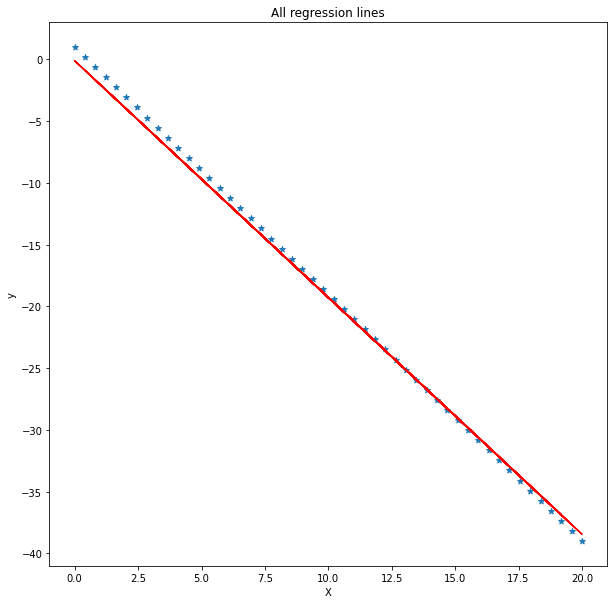

In [47]:
plot_all(cost_vals, thetas0, thetas1, 0.00007, h_s, X, y, (30, 10))

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [6]:
temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)
X, y = list(X), list(y)

In [28]:
for k in range(0, 50, 20):
  print(k)

0
20
40


In [44]:
def mini_batch(X, y, alpha, epochs, batch_size):
  ecost_vals = []
  # e_h_s = []
  thetas0 = []
  thetas1 = []
  e_cost = []
  prev_cost = 0
  m = y.shape[0]

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  i = 0
  grad = np.ones((2, 1))

  while i < epochs and np.linalg.norm(grad, 2) > 0.01:
    if i > 0:
      prev_cost = cost_vals[-1]
    cost_vals = []
    h_s = []

    print(f"****************** Epoch {i} ****************** ")
    
    # batch loop
    # batch_loop = int(np.round(m/batch_size, 0))
    # for k in range(batch_loop):
    for k in range(0, m, batch_size):
      # print(f"****************** Iteration {iter} ****************** ")
      # 2. Predict the output
      h_x = theta_0 + theta_1 * X[k : k+batch_size]
      h_s.extend(h_x)
      # print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y[k : k+batch_size]
      j = (1 / 2 * batch_size) * np.linalg.norm(error, 2)**2
      # print(f'Error Vector: \n{error}')
      # print(f'\nj = {j}')
      cost_vals.append(j)
      ecost_vals.append(j)
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / batch_size
      d_theta_1 = np.sum(error * X[k : k+batch_size]) / batch_size
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      # print(f"Gradient Vector: \n{grad}")
      # print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      theta_0 -= alpha * d_theta_0
      theta_1 -= alpha * d_theta_1
      # print(f'theta_0_new : {theta_0}')
      # print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

    print(f"h(x): {h_x}")
    print(f'Error Vector: \n{error}')
    print(f'\nj = {j}')
    print(f"Gradient Vector: \n{grad}")
    print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")
    print(f'theta_0_new : {theta_0}')
    print(f'theta_1_new : {theta_1}')

    # e_h_s.append(h_s)
    e_cost.append(cost_vals[-1])

    # Convergence check
    if i > 1 and abs(e_cost[-2] - e_cost[-1]) < 0.01:
      break

    i += 1
    
  return theta_0, theta_1, ecost_vals, h_s, thetas0, thetas1

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [45]:
y = np.array(y)
X = np.array(X)

In [48]:
theta_0, theta_1, ecost_vals, h_s, thetas0, thetas1 = mini_batch(X, y, alpha=0.0005, epochs=300, batch_size=5)

****************** Epoch 0 ****************** 
h(x): [-14.71060561 -16.04227629 -10.71559357 -13.37893493 -12.71309959]
Error Vector: 
[20.20776174 22.14139718 14.40685541 18.2741263  17.30730857]

j = 4349.098020811514
Gradient Vector: 
[[ 18.46748984]
 [310.3339373 ]]
Gradient Vector Norm: 310.88293748616616
theta_0_new : -0.0714618832979588
theta_1_new : -0.9708152595918418
****************** Epoch 1 ****************** 
h(x): [-24.74356231 -26.98376264 -18.02296131 -22.50336197 -21.38326181]
Error Vector: 
[10.17480504 11.19991083  7.09948767  9.14969925  8.63714636]

j = 1094.2116977423939
Gradient Vector: 
[[  9.25220983]
 [155.64655338]]
Gradient Vector Norm: 155.9213037633121
theta_0_new : -0.10598474305730309
theta_1_new : -1.4499459808966533
****************** Epoch 2 ****************** 
h(x): [-29.69487148 -32.38350273 -21.62897772 -27.00624023 -25.6619246 ]
Error Vector: 
[5.22349587 5.80017073 3.49347126 4.646821   4.35848356]

j = 284.3013883925351
Gradient Vector: 
[[ 4.7

In [49]:
r2_score(y,h_s)

0.9976510440440598

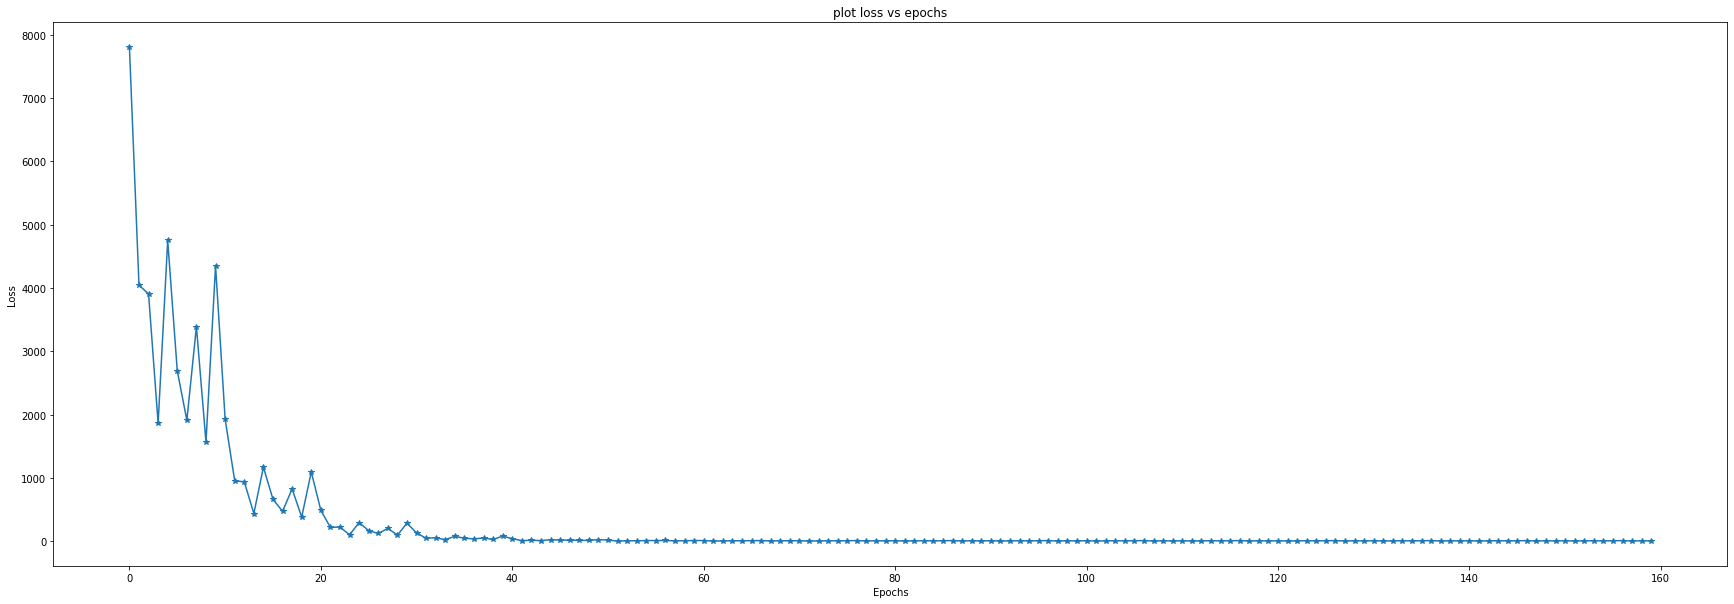

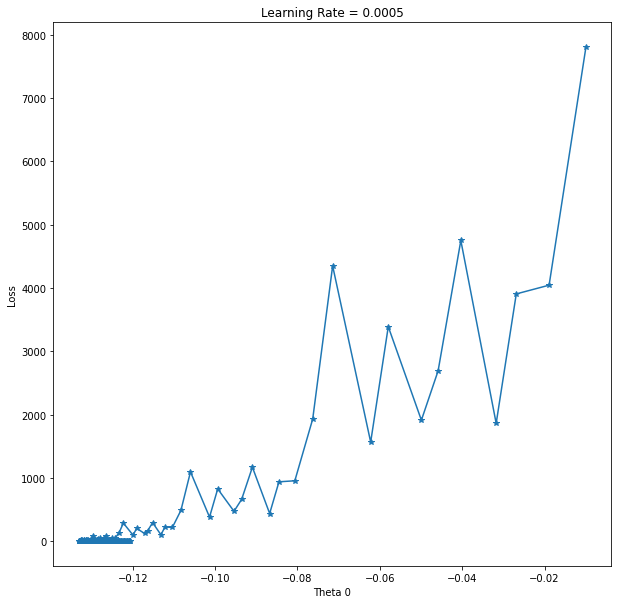

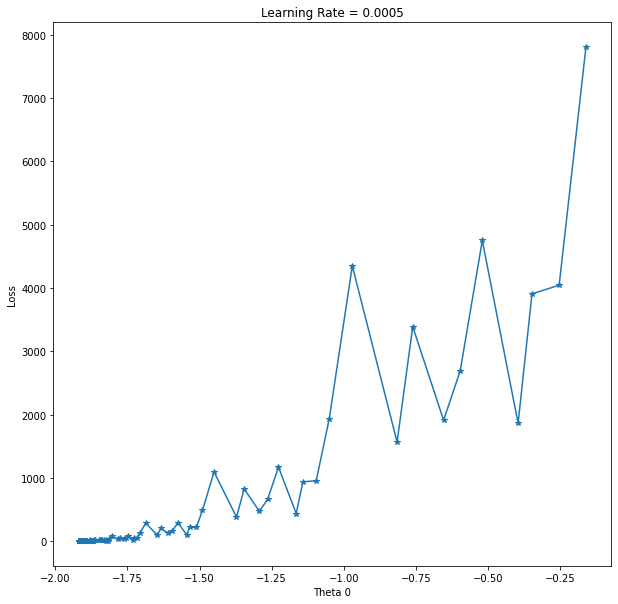

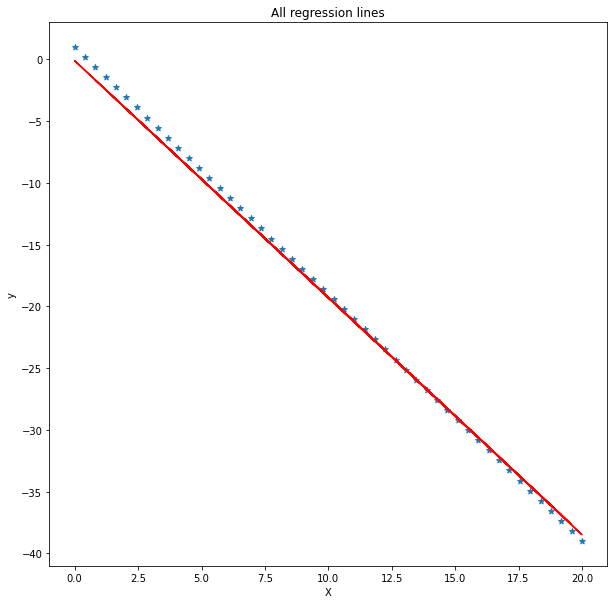

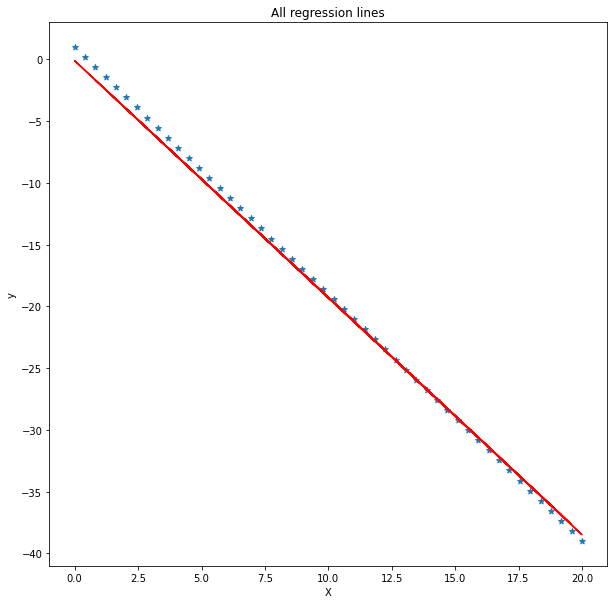

In [50]:
plot_all(ecost_vals, thetas0, thetas1, 0.0005, [h_s], X, y, (30, 10))

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [51]:
theta_0, theta_1, ecost_vals, h_s, thetas0, thetas1 = mini_batch(X, y, alpha=0.0005, epochs=300, batch_size=10)

****************** Epoch 0 ****************** 
h(x): [-2.47843366 -3.52659355 -1.25558046 -1.43027378 -8.06861973 -7.7192331
 -8.41800636 -5.62291332 -7.02045984 -6.67107321]
Error Vector: 
[ 7.95013777 11.79993706  3.45870525  4.10033847 28.48240068 27.19913425
 29.76566711 19.49953565 24.63260138 23.34933495]

j = 21002.20998979853
Gradient Vector: 
[[ 18.02377926]
 [279.04418769]]
Gradient Vector Norm: 279.6256699638585
theta_0_new : -0.04173914888113454
theta_1_new : -0.5675207144926971
****************** Epoch 1 ****************** 
h(x): [ -5.02719825  -7.15403843  -2.54588471  -2.90035807 -16.37034587
 -15.66139915 -17.0792926  -11.40771879 -14.24350569 -13.53455897]
Error Vector: 
[ 5.40137318  8.17249218  2.16840101  2.63025418 20.18067454 19.2569682
 21.10438087 13.71473019 17.40955553 16.4858492 ]

j = 10470.198366467457
Gradient Vector: 
[[ 12.65246791]
 [196.96463986]]
Gradient Vector Norm: 197.37060141052015
theta_0_new : -0.07089739705492767
theta_1_new : -0.9669420599210

In [52]:
r2_score(y,h_s)

0.9983436045258961

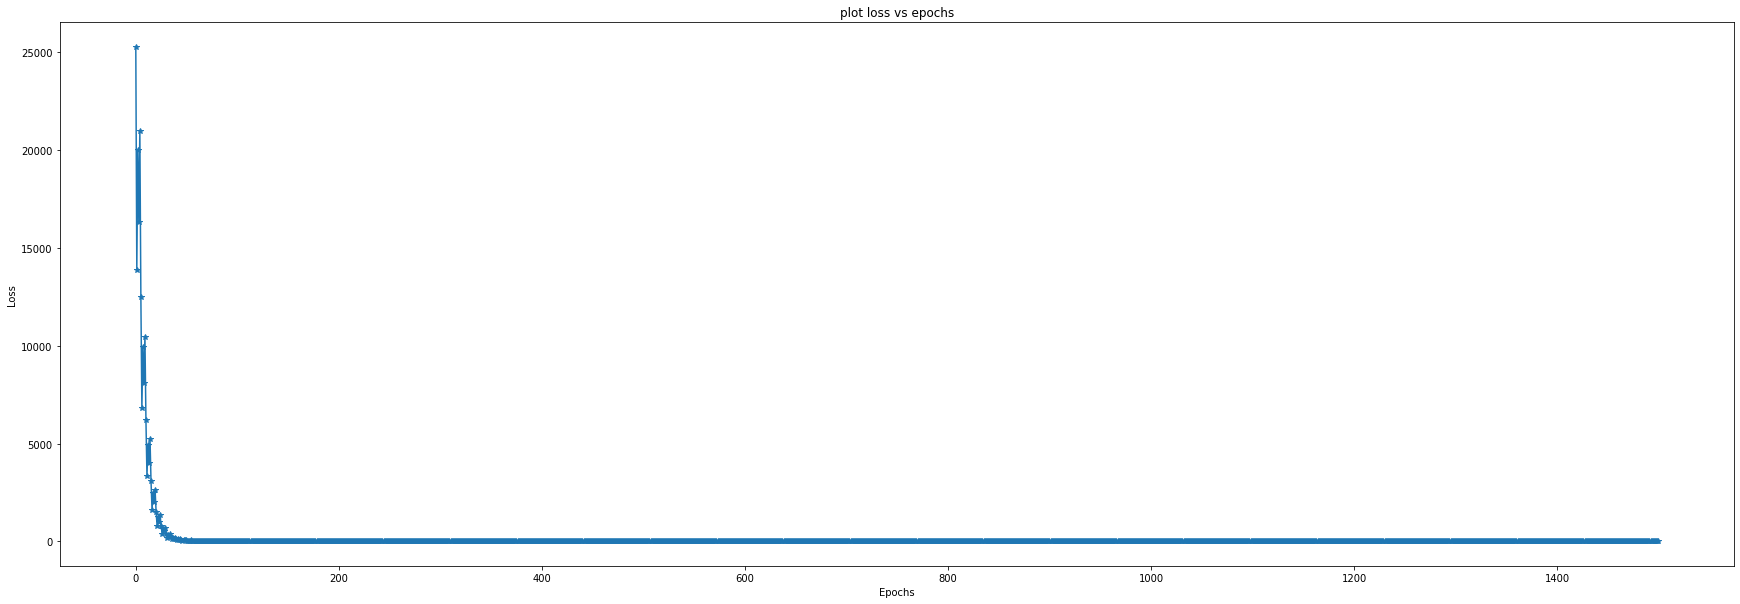

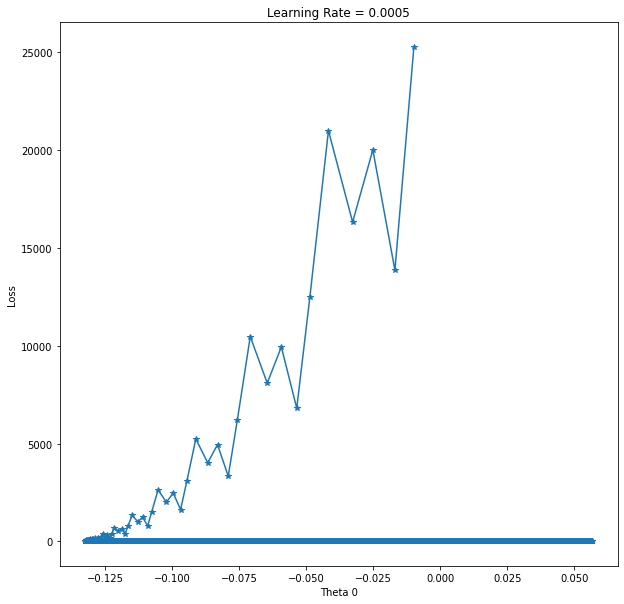

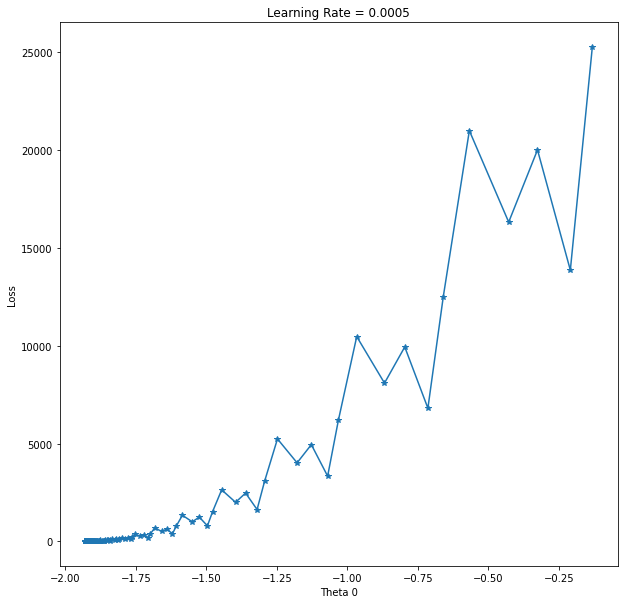

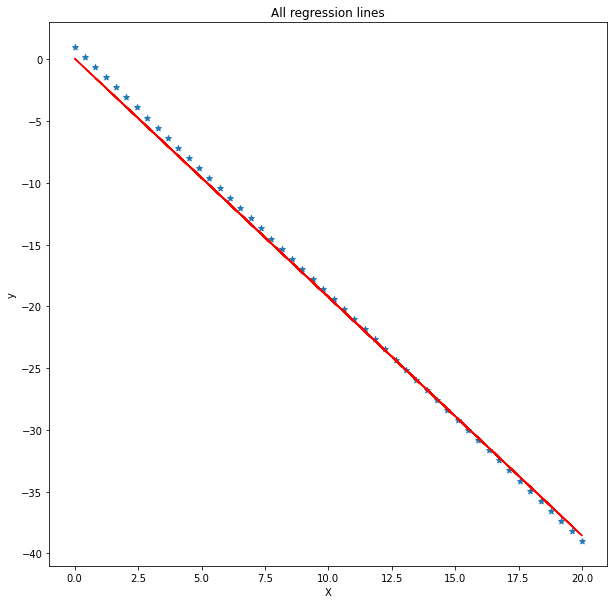

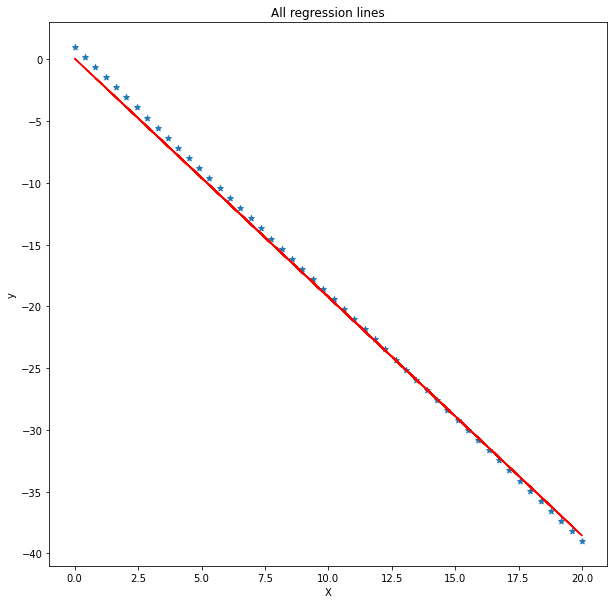

In [53]:
plot_all(ecost_vals, thetas0, thetas1, 0.0005, [h_s], X, y, (30, 10))

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [54]:
theta_0, theta_1, ecost_vals, h_s, thetas0, thetas1 = mini_batch(X, y, alpha=0.0005, epochs=300, batch_size=20)

****************** Epoch 0 ****************** 
h(x): [-1.31682397 -1.87371446 -0.66711841 -0.75993349 -4.28690656 -4.1012764
 -4.47253672 -2.98749543 -3.73001607 -3.54438591]
Error Vector: 
[ 9.11174745 13.45281615  4.04716731  4.77067875 32.26411385 30.81709095
 33.71113675 22.13495355 27.92304515 26.47602225]

j = 54008.803952423004
Gradient Vector: 
[[ 10.23543861]
 [158.21798688]]
Gradient Vector Norm: 158.5487167273099
theta_0_new : -0.022530563693338845
theta_1_new : -0.3065059411483817
****************** Epoch 1 ****************** 
h(x): [-2.87963463 -4.09786246 -1.45836884 -1.66140681 -9.37684972 -8.97077377
 -9.78292566 -6.53431812 -8.15862189 -7.75254594]
Error Vector: 
[ 7.54893679 11.22866815  3.25591688  3.86920544 27.17417069 25.94759357
 28.40074781 18.58813086 23.49443934 22.26786222]

j = 38203.21798522795
Gradient Vector: 
[[  8.58878359]
 [133.05554958]]
Gradient Vector Norm: 133.3324659518422
theta_0_new : -0.04139742854112534
theta_1_new : -0.5639708043918527
*****

In [55]:
r2_score(y,h_s)

0.9979956400670293

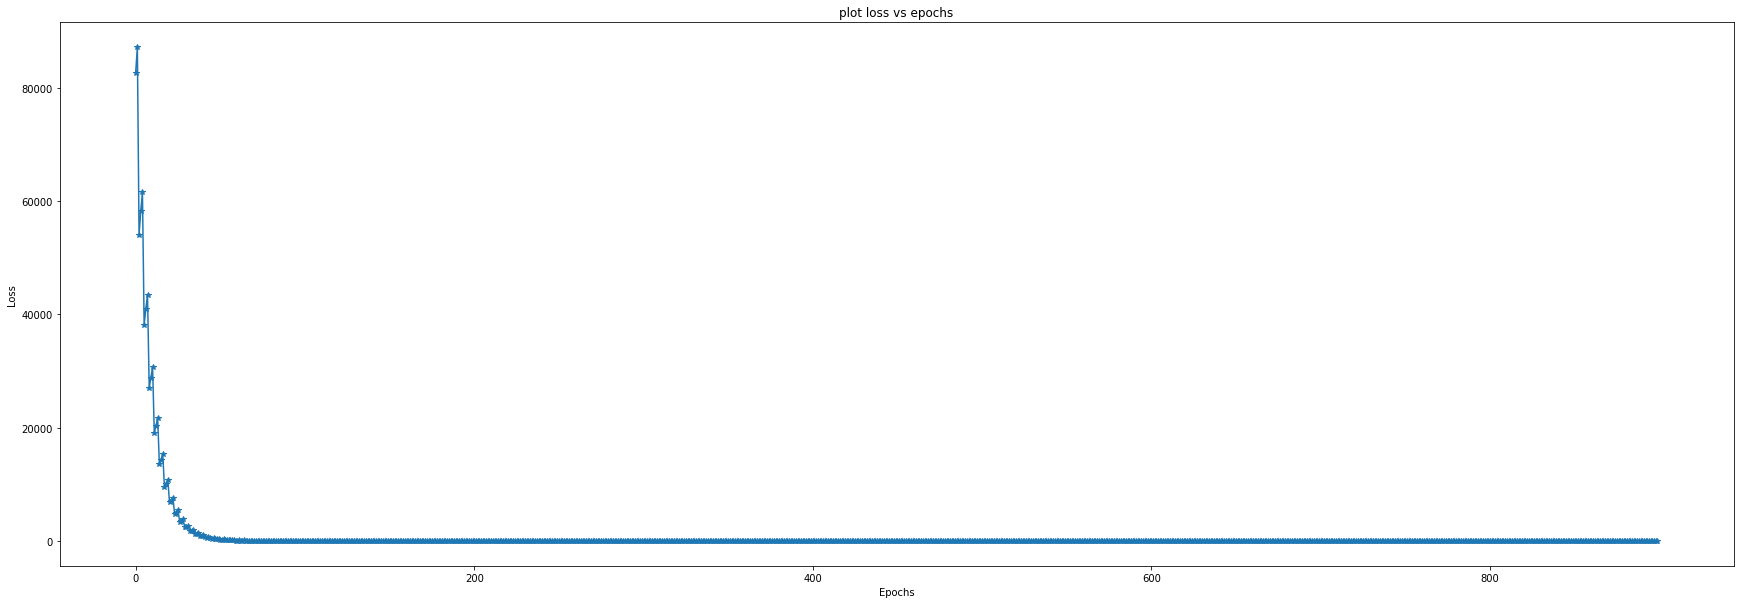

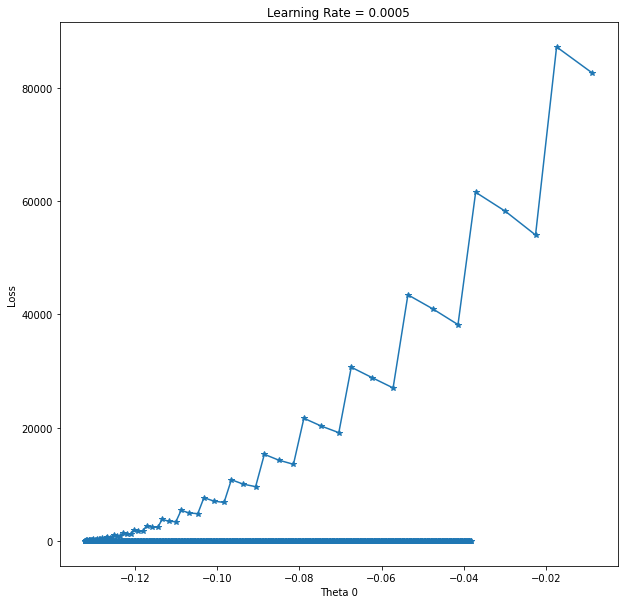

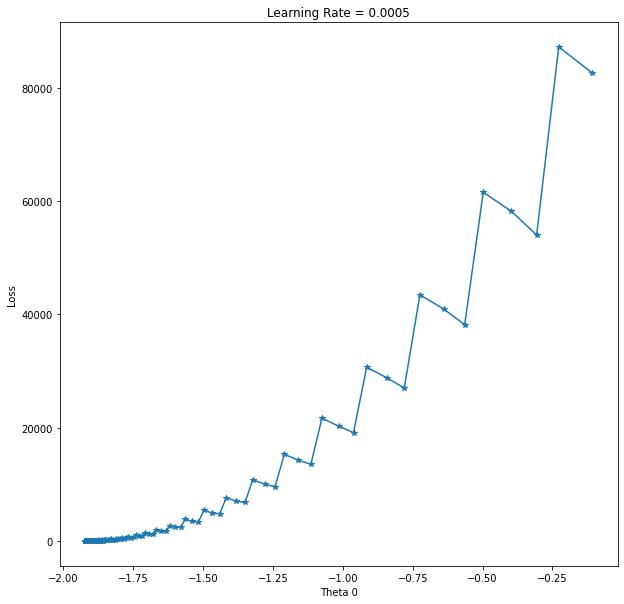

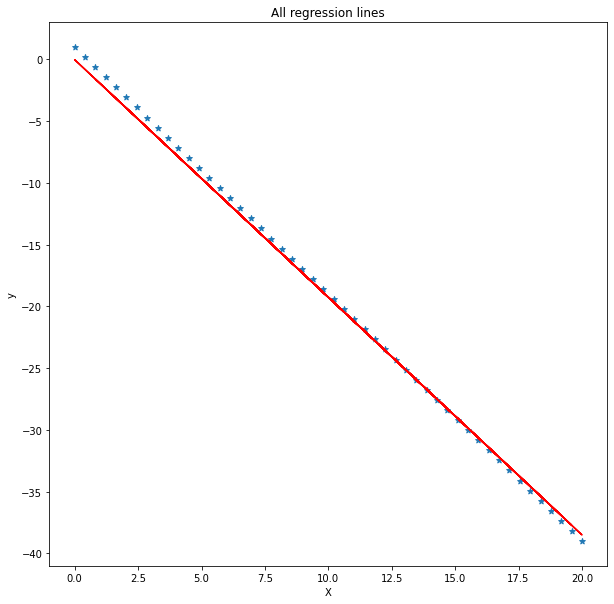

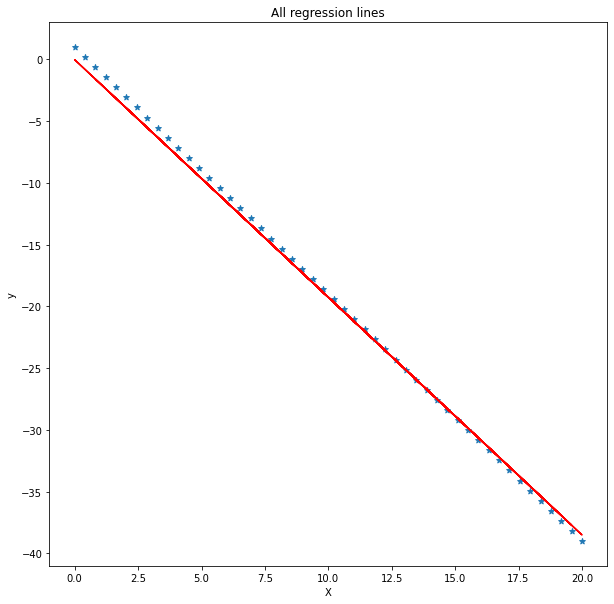

In [56]:
plot_all(ecost_vals, thetas0, thetas1, 0.0005, [h_s], X, y, (30, 10))